In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import optuna

In [3]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
X=np.load("../input/distilbert-embeddings/albert_10_epochs_embeddings_last_4.npy")
Y=np.load("../input/distilbert-embeddings/albert_10_epochs_targets_last_4.npy")

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2,stratify=Y)

In [6]:
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50)
        }
    clf = RandomForestClassifier(random_state=42,**params)
    return cross_val_score(clf,X_train,Y_train,n_jobs=-1,cv=4).mean()

In [7]:
study=optuna.create_study(direction='maximize',study_name="Random_forest_trial")
study.optimize(objective,n_trials=10)

[I 2022-05-26 21:33:33,816] A new study created in memory with name: Random_forest_trial
[I 2022-05-26 21:34:29,867] Trial 0 finished with value: 0.9715825279708721 and parameters: {'n_estimators': 944, 'max_depth': 15}. Best is trial 0 with value: 0.9715825279708721.
[I 2022-05-26 21:35:11,951] Trial 1 finished with value: 0.9724438544135938 and parameters: {'n_estimators': 728, 'max_depth': 30}. Best is trial 1 with value: 0.9724438544135938.
[I 2022-05-26 21:36:01,722] Trial 2 finished with value: 0.9717978595815526 and parameters: {'n_estimators': 868, 'max_depth': 39}. Best is trial 1 with value: 0.9724438544135938.
[I 2022-05-26 21:36:07,472] Trial 3 finished with value: 0.9726591860242743 and parameters: {'n_estimators': 101, 'max_depth': 10}. Best is trial 3 with value: 0.9726591860242743.
[I 2022-05-26 21:36:21,427] Trial 4 finished with value: 0.9692138802533872 and parameters: {'n_estimators': 305, 'max_depth': 6}. Best is trial 3 with value: 0.9726591860242743.
[I 2022-05-2

In [8]:
trial=study.best_trial
for key, value in trial.params.items():
    print('\t\t{}: {}'.format(key, value))

		n_estimators: 101
		max_depth: 10


In [9]:
clf = RandomForestClassifier(random_state=42,**trial.params)
clf.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=10, n_estimators=101, random_state=42)

In [10]:
clf.score(X_test,Y_test)

0.9380378657487092

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'BHO'),
  Text(1.5, 0, 'CeeInject'),
  Text(2.5, 0, 'FakeRean'),
  Text(3.5, 0, 'OnLineGames'),
  Text(4.5, 0, 'Renos'),
  Text(5.5, 0, 'Vobfus'),
  Text(6.5, 0, 'Winwebsec')])

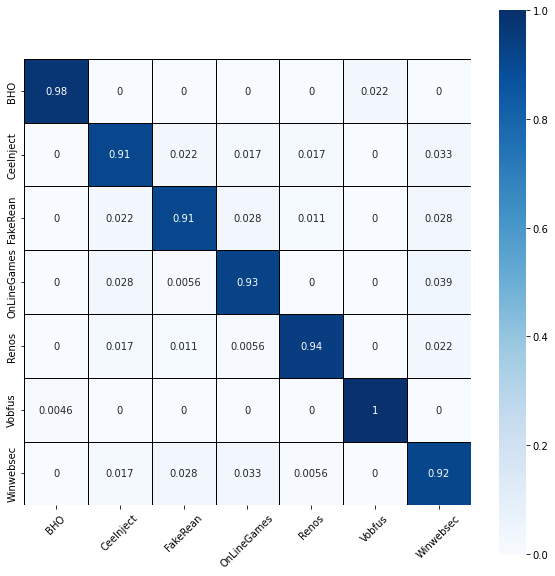

In [11]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,clf.predict(X_test),normalize="true")
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cf, annot=True,cmap="Blues",linewidth=1,linecolor="black",square=True,vmax=1.0)
ax.set_xticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
ax.set_yticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
plt.xticks(rotation=45)

In [12]:
from sklearn.svm import SVC

In [13]:
Y_train=Y_train.reshape(Y_train.shape[0])

In [14]:
from sklearn.model_selection import cross_val_score
def objective(trial):
    svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
    classifier_obj = SVC(C=svc_c,kernel="rbf",gamma="scale")
    return cross_val_score(classifier_obj,X_train,Y_train,n_jobs=-1,cv=4).mean()

In [15]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

[I 2022-05-26 21:38:42,700] A new study created in memory with name: no-name-c4b68786-811f-4b5d-901b-a00efed7748d
[I 2022-05-26 21:38:43,966] Trial 0 finished with value: 0.969214065564584 and parameters: {'svc_c': 193.42197851925243}. Best is trial 0 with value: 0.969214065564584.
[I 2022-05-26 21:39:04,785] Trial 1 finished with value: 0.1868676255409234 and parameters: {'svc_c': 9.274820680486518e-09}. Best is trial 0 with value: 0.969214065564584.
[I 2022-05-26 21:39:25,257] Trial 2 finished with value: 0.8667382709131097 and parameters: {'svc_c': 0.0018621374894814003}. Best is trial 0 with value: 0.969214065564584.
[I 2022-05-26 21:39:45,748] Trial 3 finished with value: 0.1868676255409234 and parameters: {'svc_c': 1.0997716609513507e-09}. Best is trial 0 with value: 0.969214065564584.
[I 2022-05-26 21:39:47,067] Trial 4 finished with value: 0.9659846473379675 and parameters: {'svc_c': 189633.75855673695}. Best is trial 0 with value: 0.969214065564584.
[I 2022-05-26 21:40:08,161]

In [16]:
trial=study.best_trial
clf=SVC(C=trial.params["svc_c"],kernel="rbf",gamma="scale")
#clf=SVC(C=3415106405.538255,kernel="rbf",gamma="scale")
clf.fit(X_train,Y_train)

SVC(C=193.42197851925243)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'BHO'),
  Text(1.5, 0, 'CeeInject'),
  Text(2.5, 0, 'FakeRean'),
  Text(3.5, 0, 'OnLineGames'),
  Text(4.5, 0, 'Renos'),
  Text(5.5, 0, 'Vobfus'),
  Text(6.5, 0, 'Winwebsec')])

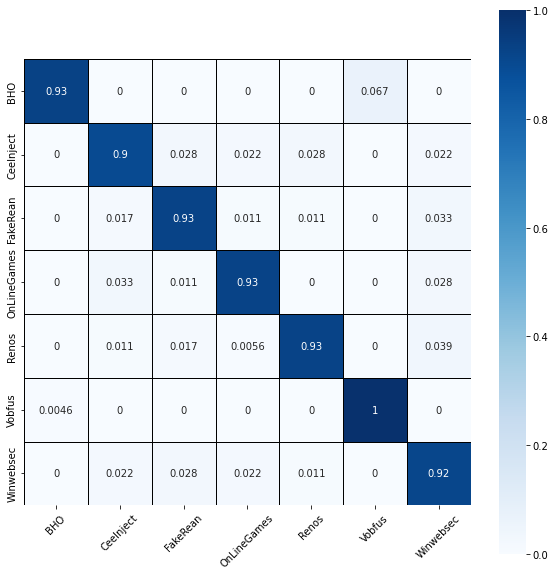

In [17]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,clf.predict(X_test),normalize="true")
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cf, annot=True,cmap="Blues",linewidth=1,linecolor="black",square=True,vmax=1.0)
ax.set_xticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
ax.set_yticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
plt.xticks(rotation=45)

In [18]:
clf.score(X_test,Y_test)

0.9345955249569707

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
clf=KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=25)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'BHO'),
  Text(1.5, 0, 'CeeInject'),
  Text(2.5, 0, 'FakeRean'),
  Text(3.5, 0, 'OnLineGames'),
  Text(4.5, 0, 'Renos'),
  Text(5.5, 0, 'Vobfus'),
  Text(6.5, 0, 'Winwebsec')])

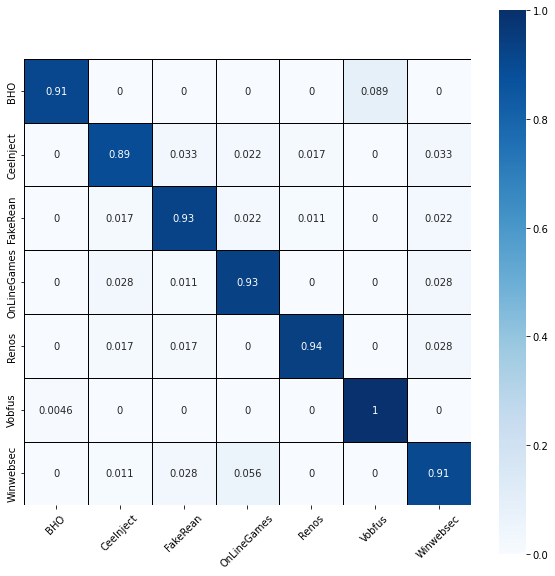

In [21]:
cf=confusion_matrix(Y_test,clf.predict(X_test),normalize="true")
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cf, annot=True,cmap="Blues",linewidth=1,linecolor="black",square=True,vmax=1.0)
ax.set_xticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
ax.set_yticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
plt.xticks(rotation=45)

In [22]:
clf.score(X_test,Y_test)

0.9337349397590361